#  Решение задачи классификации при помощи пакета `torch`.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann 
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://lightning.ai/docs/torchmetrics/stable/
* https://pytorch.org/docs/stable/generated/torch.no_grad.html
* https://www.learnpytorch.io/02_pytorch_classification/
* https://pytorch.org/docs/stable/data.html#torch.utils.data.WeightedRandomSampler
* https://towardsdatascience.com/demystifying-pytorchs-weightedrandomsampler-by-example-a68aceccb45
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://medium.com/@zergtant/use-weighted-loss-function-to-solve-imbalanced-data-classification-problems-749237f38b7
* https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
* https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss52

## Задачи для совместного разбора

In [169]:
from torchtyping import TensorType, patch_typeguard
from typeguard import typechecked
import torch as th
from sklearn.model_selection import train_test_split 
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler





Scalar = TensorType[()]
patch_typeguard()

1\. Обсудите подходы к решению задачи классификации на примере синтетического датасета.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. Разделите датасет на обучающую и тестовую выборку в соотношении 80% на 20%. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim.SGD`. 

Используйте модель, состоящую из двух слоев:
1. Полносвязный слой с 10 нейронами;
2. Полносвязный слой с 2 нейронами.

Выведите график изменения значения функции потерь в процессе обучения. Выведите на экран значения Accuracy, Precision, Recall и F1 для обучающего и тестового множества. 

Выведите на экран облако точек с цветом, соответствующим предсказаниям модели на всем датасете (и обучающей, и тестовой части). 

- [ ] Проверено на семинаре 


In [107]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)



class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),  
            nn.Linear(hidden_size, num_classes)  
        )
    
    def forward(self, x):
        return self.network(x)





=== НАЧАЛО ОБУЧЕНИЯ ===
Epoch    0, Loss: 0.696209, Train Acc: 0.4875, Test Acc: 0.4850
Epoch  100, Loss: 0.693403, Train Acc: 0.5050, Test Acc: 0.4750
Epoch  200, Loss: 0.693282, Train Acc: 0.5038, Test Acc: 0.4750
Epoch  300, Loss: 0.693357, Train Acc: 0.5125, Test Acc: 0.4900
Epoch  400, Loss: 0.693325, Train Acc: 0.5150, Test Acc: 0.4900
Epoch  500, Loss: 0.693375, Train Acc: 0.5062, Test Acc: 0.4800
Epoch  600, Loss: 0.693313, Train Acc: 0.5050, Test Acc: 0.4850
Epoch  700, Loss: 0.693451, Train Acc: 0.5125, Test Acc: 0.4900
Epoch  800, Loss: 0.693330, Train Acc: 0.5088, Test Acc: 0.4850
Epoch  900, Loss: 0.693381, Train Acc: 0.5150, Test Acc: 0.4950
Epoch  999, Loss: 0.693495, Train Acc: 0.5050, Test Acc: 0.4900

ОБУЧАЮЩАЯ ВЫБОРКА:
  Accuracy:  0.5050
  Precision: 0.5047
  Recall:    0.5375
  F1-score:  0.5206

ТЕСТОВАЯ ВЫБОРКА:
  Accuracy:  0.4900
  Precision: 0.4911
  Recall:    0.5500
  F1-score:  0.5189


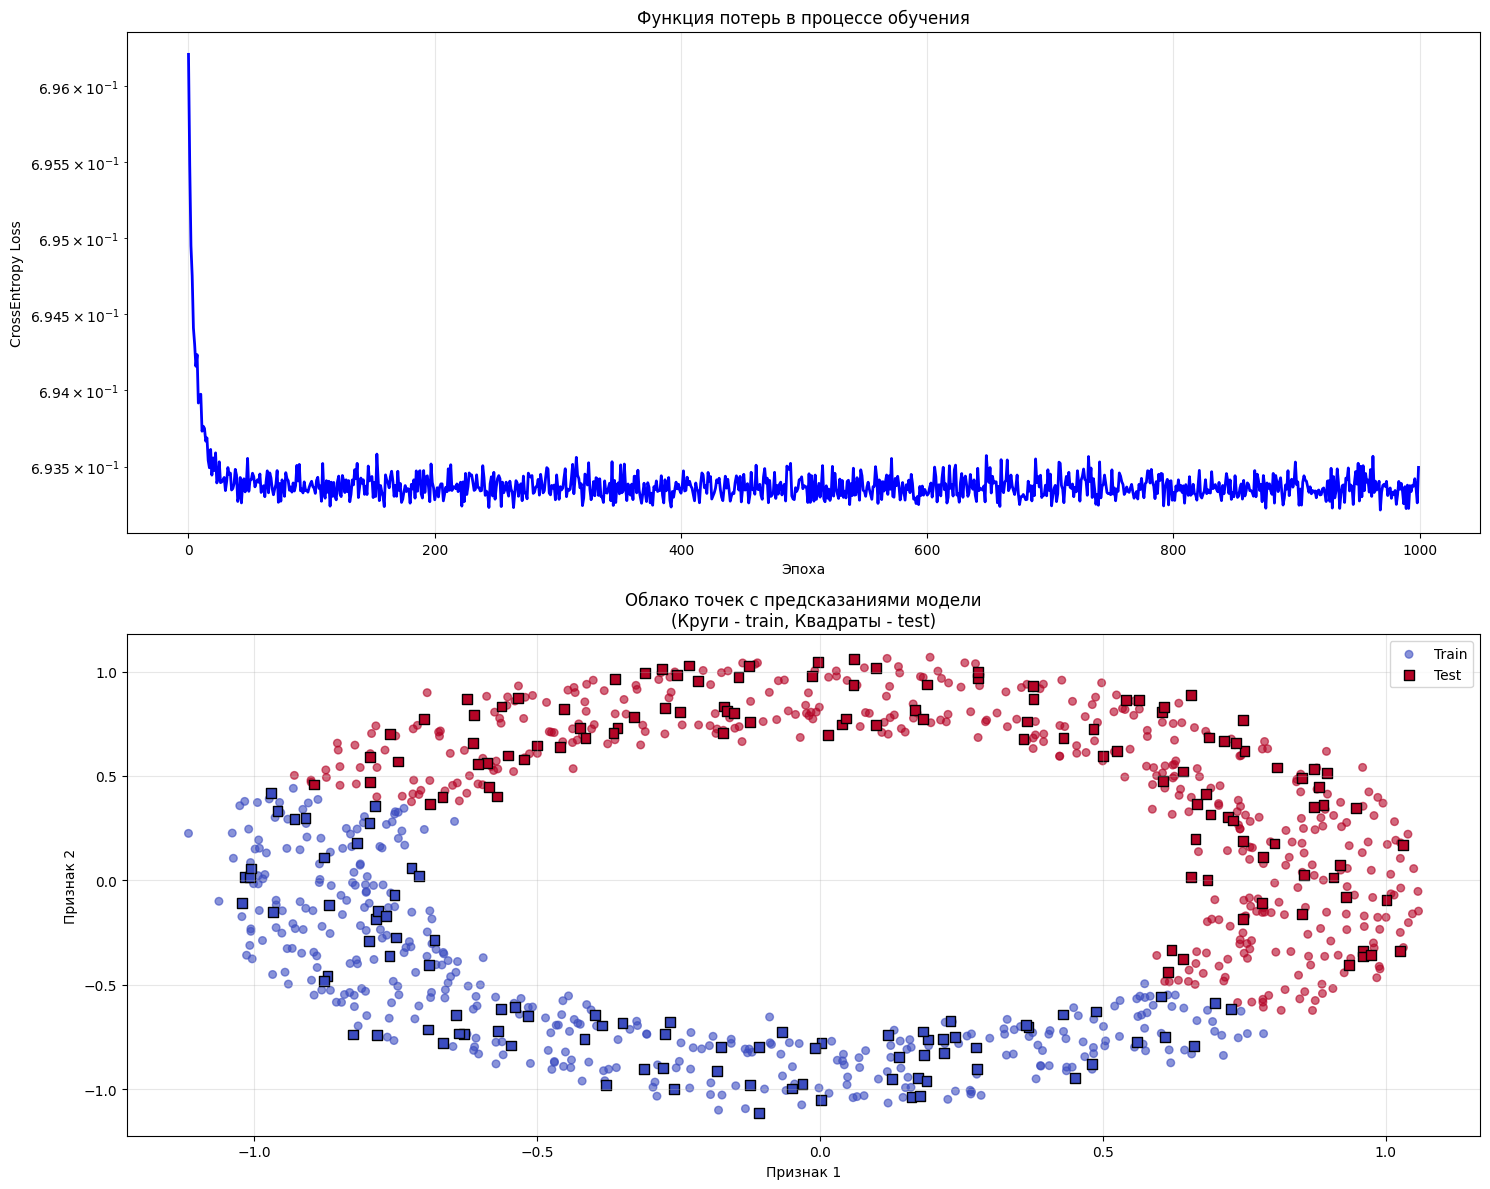

In [111]:
input_size = X.shape[1]
hidden_size = 10
num_classes = len(torch.unique(y))

model = ClassificationModel(input_size, hidden_size, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

def calculate_metrics(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        
        y_np = y.numpy()
        predicted_np = predicted.numpy()
        
        accuracy = accuracy_score(y_np, predicted_np)
        precision = precision_score(y_np, predicted_np, average='binary', zero_division=0)
        recall = recall_score(y_np, predicted_np, average='binary', zero_division=0)
        f1 = f1_score(y_np, predicted_np, average='binary', zero_division=0)
        
        return accuracy, precision, recall, f1, predicted

def print_metrics(accuracy, precision, recall, f1, dataset_name):
    print(f"\n{dataset_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

def train_model(model, train_loader, test_loader, epochs=1000):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    
    print("\n=== НАЧАЛО ОБУЧЕНИЯ ===")
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        batch_count = 0
        
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            batch_count += 1
        
        avg_loss = epoch_loss / batch_count
        train_losses.append(avg_loss)
        
        if epoch % 100 == 0 or epoch == epochs - 1:

            train_accuracy, _, _, _, _ = calculate_metrics(model, X_train, y_train)
            train_accuracies.append(train_accuracy)
            
            test_accuracy, _, _, _, _ = calculate_metrics(model, X_test, y_test)
            test_accuracies.append(test_accuracy)
            
            print(f'Epoch {epoch:4d}, Loss: {avg_loss:.6f}, '
                  f'Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}')
    
    return train_losses, train_accuracies, test_accuracies


train_losses, train_accuracies, test_accuracies = train_model(
    model, train_loader, test_loader, epochs=1000
)

train_accuracy, train_precision, train_recall, train_f1, _ = calculate_metrics(model, X_train, y_train)
print_metrics(train_accuracy, train_precision, train_recall, train_f1, "ОБУЧАЮЩАЯ ВЫБОРКА")

test_accuracy, test_precision, test_recall, test_f1, test_predicted = calculate_metrics(model, X_test, y_test)
print_metrics(test_accuracy, test_precision, test_recall, test_f1, "ТЕСТОВАЯ ВЫБОРКА")


def plot_results(X_train, y_train, X_test, y_test, model, train_losses):

    fig, ((ax1, ax3)) = plt.subplots(2, 1, figsize=(15, 12))
    
    # График 1: Функция потерь
    ax1.plot(train_losses, 'b-', linewidth=2)
    ax1.set_xlabel('Эпоха')
    ax1.set_ylabel('CrossEntropy Loss')
    ax1.set_title('Функция потерь в процессе обучения')
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    

    model.eval()
    with torch.no_grad():
        X_all = torch.cat([X_train, X_test])
        outputs_all = model(X_all)
        _, predicted_all = torch.max(outputs_all, 1)
        
        train_size = len(X_train)
        train_predicted = predicted_all[:train_size]
        test_predicted = predicted_all[train_size:]
    

    scatter1 = ax3.scatter(X_train[:, 0], X_train[:, 1], 
                          c=train_predicted, cmap='coolwarm', 
                          alpha=0.6, s=30, label='Train', marker='o')
  
    scatter2 = ax3.scatter(X_test[:, 0], X_test[:, 1], 
                          c=test_predicted, cmap='coolwarm', 
                          alpha=1.0, s=50, label='Test', marker='s', edgecolors='black')
    
    ax3.set_xlabel('Признак 1')
    ax3.set_ylabel('Признак 2')
    ax3.set_title('Облако точек с предсказаниями модели\n(Круги - train, Квадраты - test)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


plot_results(X_train, y_train, X_test, y_test, model, train_losses)


<p class="task" id="2"></p>

2\. Повторите задачу 1, используя другую архитектуру нейронной сети.

1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

- [ ] Проверено на семинаре


=== НАЧАЛО ОБУЧЕНИЯ ===
Epoch    0, Loss: 0.718350, Train Acc: 0.5000, Test Acc: 0.4600
Epoch  100, Loss: 0.676056, Train Acc: 0.7250, Test Acc: 0.7750
Epoch  200, Loss: 0.640968, Train Acc: 0.8075, Test Acc: 0.8000
Epoch  300, Loss: 0.580543, Train Acc: 0.8725, Test Acc: 0.8450
Epoch  400, Loss: 0.495852, Train Acc: 0.9213, Test Acc: 0.9100
Epoch  500, Loss: 0.400999, Train Acc: 0.9450, Test Acc: 0.9450
Epoch  600, Loss: 0.316079, Train Acc: 0.9613, Test Acc: 0.9650
Epoch  700, Loss: 0.254414, Train Acc: 0.9688, Test Acc: 0.9650
Epoch  800, Loss: 0.211761, Train Acc: 0.9663, Test Acc: 0.9700
Epoch  900, Loss: 0.182139, Train Acc: 0.9650, Test Acc: 0.9700
Epoch  999, Loss: 0.160826, Train Acc: 0.9712, Test Acc: 0.9750

ОБУЧАЮЩАЯ ВЫБОРКА:
  Accuracy:  0.9712
  Precision: 0.9748
  Recall:    0.9675
  F1-score:  0.9711

ТЕСТОВАЯ ВЫБОРКА:
  Accuracy:  0.9750
  Precision: 0.9703
  Recall:    0.9800
  F1-score:  0.9751


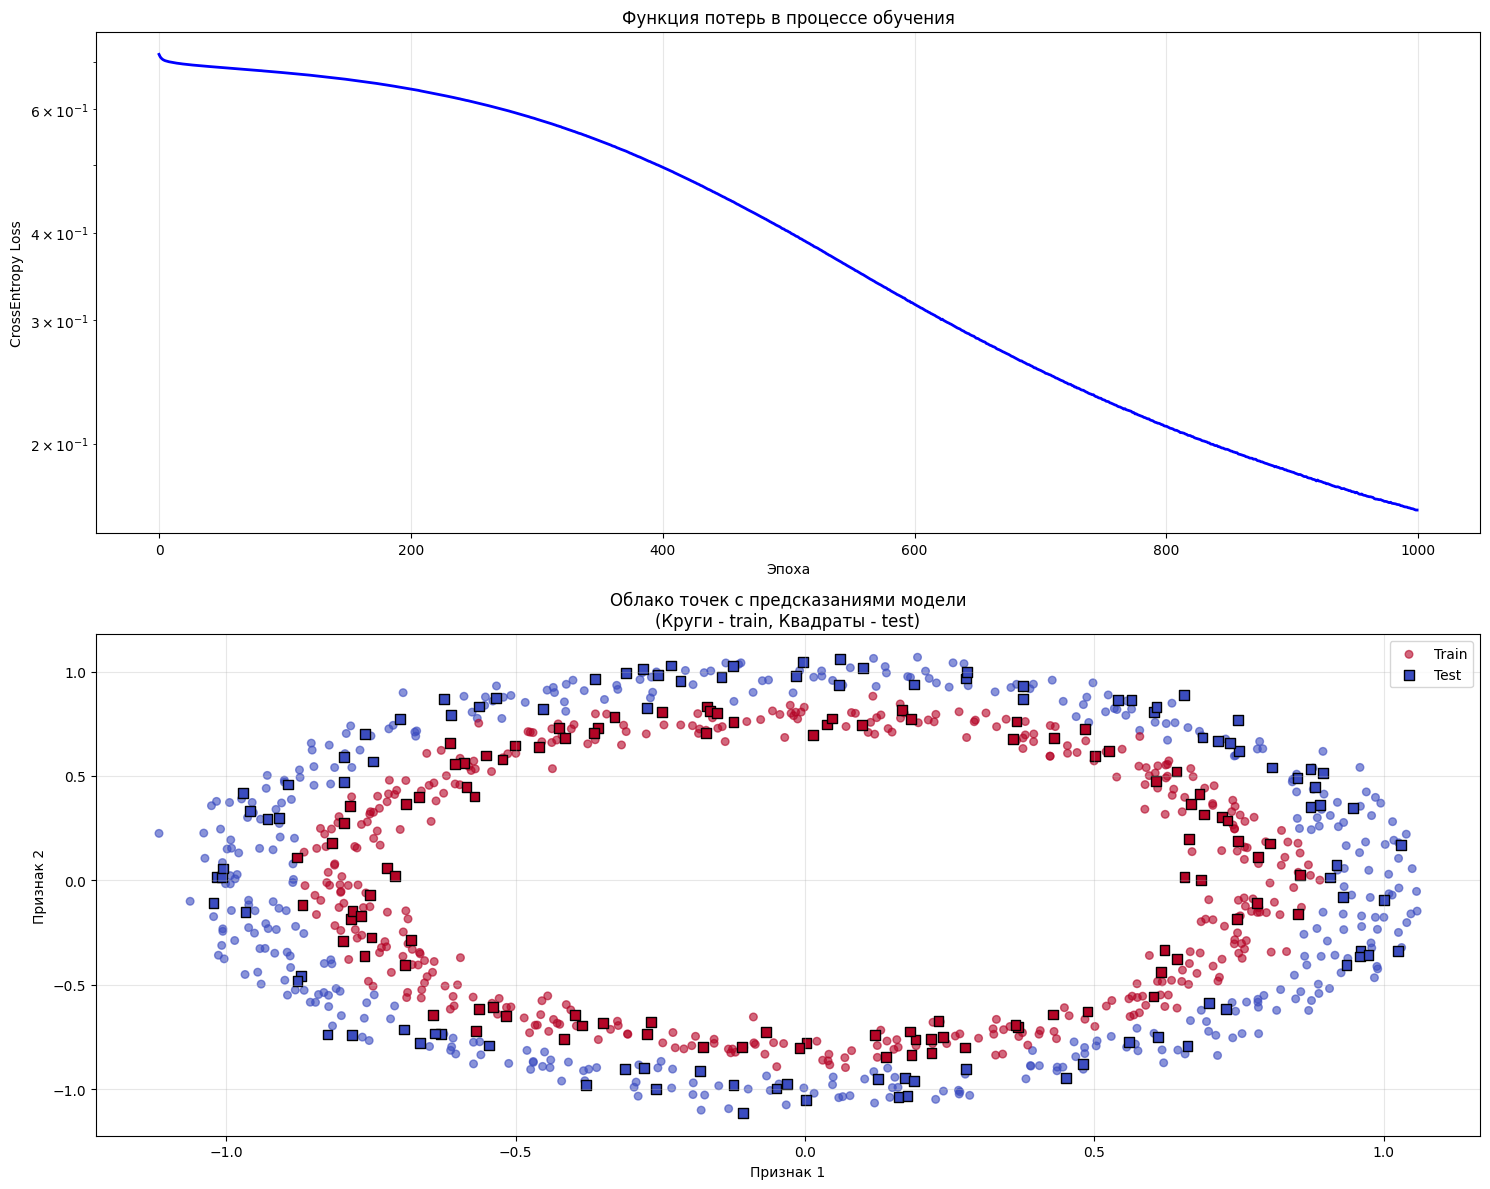

In [115]:



class CircleClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CircleClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size), 
            nn.ReLU(),   
            nn.Linear(hidden_size, num_classes)  
        )
    
    def forward(self, x):
        return self.network(x)

circle_model = CircleClassificationModel(input_size, hidden_size, num_classes)

optimizer = optim.SGD(circle_model.parameters(), lr=0.01)

train_losses, train_accuracies, test_accuracies = train_model(
    circle_model, train_loader, test_loader, epochs=1000
)

train_accuracy, train_precision, train_recall, train_f1, _ = calculate_metrics(circle_model, X_train, y_train)
print_metrics(train_accuracy, train_precision, train_recall, train_f1, "ОБУЧАЮЩАЯ ВЫБОРКА")

test_accuracy, test_precision, test_recall, test_f1, test_predicted = calculate_metrics(circle_model, X_test, y_test)
print_metrics(test_accuracy, test_precision, test_recall, test_f1, "ТЕСТОВАЯ ВЫБОРКА")


plot_results(X_train, y_train, X_test, y_test, circle_model, train_losses)

<p class="task" id="3"></p>

3\. `CrossEntropyLoss` может быть использована для задачи классификации на любое количество классов. Для задачи бинарной классификации существуют специфические функции потерь. Решите задачу 2, используя `BCEWithLogitsLoss` в качестве функции потерь.

- [ ] Проверено на семинаре


=== НАЧАЛО ОБУЧЕНИЯ ===
Epoch    0, Loss: 0.698513, Train Acc: 0.5000, Test Acc: 0.5000
Epoch  100, Loss: 0.248874, Train Acc: 0.9587, Test Acc: 0.9550
Epoch  200, Loss: 0.109447, Train Acc: 0.9688, Test Acc: 0.9750
Epoch  300, Loss: 0.088990, Train Acc: 0.9725, Test Acc: 0.9950
Epoch  400, Loss: 0.079078, Train Acc: 0.9738, Test Acc: 0.9900
Epoch  500, Loss: 0.075148, Train Acc: 0.9738, Test Acc: 0.9950
Epoch  600, Loss: 0.072660, Train Acc: 0.9750, Test Acc: 0.9900
Epoch  700, Loss: 0.069798, Train Acc: 0.9675, Test Acc: 0.9900
Epoch  800, Loss: 0.068778, Train Acc: 0.9738, Test Acc: 0.9900
Epoch  900, Loss: 0.069835, Train Acc: 0.9762, Test Acc: 0.9950
Epoch  999, Loss: 0.069805, Train Acc: 0.9675, Test Acc: 0.9850

ОБУЧАЮЩАЯ ВЫБОРКА:
  Accuracy:  0.9675
  Precision: 0.9561
  Recall:    0.9800
  F1-score:  0.9679

ТЕСТОВАЯ ВЫБОРКА:
  Accuracy:  0.9850
  Precision: 0.9709
  Recall:    1.0000
  F1-score:  0.9852


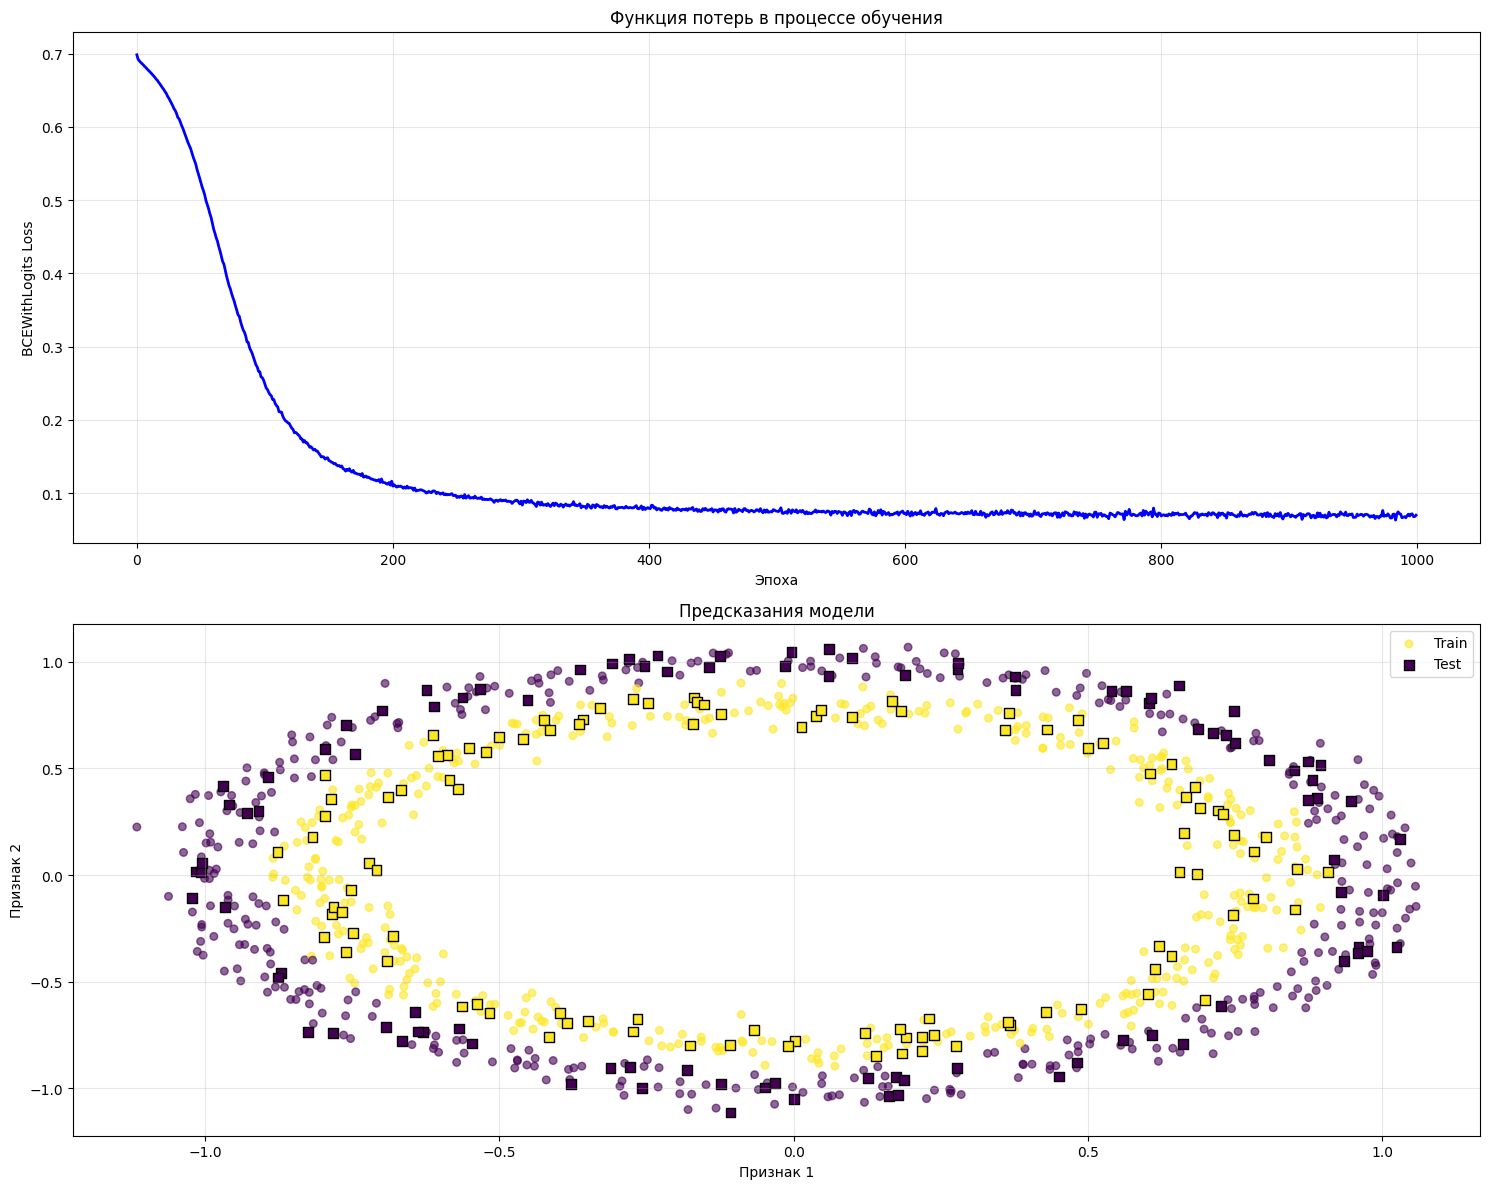

In [117]:
def calculate_metrics(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        probabilities = th.sigmoid(outputs)  # для бинарной классификации
        predicted = (probabilities > 0.5).float() 

        y = y.squeeze().numpy()   
        predicted = predicted.squeeze().numpy()   
        accuracy = accuracy_score(y, predicted)
        precision = precision_score(y, predicted, average='binary', zero_division=0)
        recall = recall_score(y, predicted, average='binary', zero_division=0)
        f1 = f1_score(y, predicted, average='binary', zero_division=0)
        
        return accuracy, precision, recall, f1, predicted


y_train_bce = y_train.float().unsqueeze(1)
y_test_bce = y_test.float().unsqueeze(1)


train_dataset = TensorDataset(X_train, y_train_bce)
test_dataset = TensorDataset(X_test, y_test_bce)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

def plot_results(X_train, y_train_orig, X_test, y_test_orig, model, train_losses):
    model.eval()
    with th.no_grad():
        # Предсказания для визуализации
        train_outputs = model(X_train)
        train_probs = th.sigmoid(train_outputs)
        train_pred = (train_probs > 0.5).float()
        
        test_outputs = model(X_test)
        test_probs = th.sigmoid(test_outputs)
        test_pred = (test_probs > 0.5).float()
    
    fig, ((ax1), (ax3)) = plt.subplots(2, 1, figsize=(15, 12))
    

    ax1.plot(train_losses, 'b-', linewidth=2)
    ax1.set_xlabel('Эпоха')
    ax1.set_ylabel('BCEWithLogits Loss')
    ax1.set_title('Функция потерь в процессе обучения')
    ax1.grid(True, alpha=0.3)
    
    
    
    ax3.scatter(X_train[:, 0], X_train[:, 1], c=train_pred.squeeze(), cmap='viridis', 
                alpha=0.6, s=30, label='Train')
    ax3.scatter(X_test[:, 0], X_test[:, 1], c=test_pred.squeeze(), cmap='viridis', 
                alpha=1.0, s=50, label='Test', marker='s', edgecolors='black')
    ax3.set_xlabel('Признак 1')
    ax3.set_ylabel('Признак 2')
    ax3.set_title('Предсказания модели')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()



criterion = nn.BCEWithLogitsLoss()


class CircleClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CircleClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size), 
            nn.ReLU(),   
            nn.Linear(hidden_size, 1) 
        )
    
    def forward(self, x):
        return self.network(x)

circle_model_3 = CircleClassificationModel(input_size, hidden_size, num_classes)

optimizer = optim.SGD(circle_model_3.parameters(), lr=0.1)

train_losses, train_accuracies, test_accuracies = train_model(
    circle_model_3, train_loader, test_loader, epochs=1000
)

train_accuracy, train_precision, train_recall, train_f1, _ = calculate_metrics(circle_model_3, X_train, y_train_bce)
print_metrics(train_accuracy, train_precision, train_recall, train_f1, "ОБУЧАЮЩАЯ ВЫБОРКА")

test_accuracy, test_precision, test_recall, test_f1, test_predicted = calculate_metrics(circle_model_3, X_test, y_test_bce)
print_metrics(test_accuracy, test_precision, test_recall, test_f1, "ТЕСТОВАЯ ВЫБОРКА")


plot_results(X_train, y_train, X_test, y_test, circle_model_3, train_losses)

<p class="task" id="4"></p>

4\. На практике часто задача классификации является несбалансированной. В файлах каталога `imb_task` содержится несбалансированный набор данных. Обучите модель без учета несбалансированности классов (аналогично предыдущим заданиям, можно использовать любую подходящую функцию потерь). Повысьте качество модели (в смысле F1) путем модификации функции потерь (указания специального аргумента, позволяющего учесть несбалансированность классов).

- [ ] Проверено на семинаре

In [136]:


X = torch.load('data/imb_task/imb_X.th')
y = torch.load('data/imb_task/imb_y.th')

X = X.float()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)


input_size = X.shape[1]
hidden_size = 64
num_classes = len(torch.unique(y))


In [138]:
# не учитываем дисбаланс классов

def train_model(model, criterion, X_train, y_train, X_test, y_test, epochs=100):
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = torch.argmax(model(X_train), 1)
                test_preds = torch.argmax(model(X_test), 1)
                
                train_f1 = f1_score(y_train, train_preds, average='weighted')
                test_f1 = f1_score(y_test, test_preds, average='weighted')
                
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, '
                      f'Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}')

# Модель без учета дисбаланса
model_basic = SimpleNN(input_size, hidden_size, num_classes)
train_model(model_basic, nn.CrossEntropyLoss(), X_train, y_train, X_test, y_test)

Epoch [20/100], Loss: 0.6283, Train F1: 0.8132, Test F1: 0.8081
Epoch [40/100], Loss: 0.5885, Train F1: 0.8469, Test F1: 0.8473
Epoch [60/100], Loss: 0.5546, Train F1: 0.8624, Test F1: 0.8551
Epoch [80/100], Loss: 0.5256, Train F1: 0.8654, Test F1: 0.8643
Epoch [100/100], Loss: 0.5006, Train F1: 0.8658, Test F1: 0.8658


In [175]:
def train_model(model, criterion, X_train, y_train, X_test, y_test, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = torch.argmax(model(X_train), 1)
                test_preds = torch.argmax(model(X_test), 1)
                
                train_f1 = f1_score(y_train.numpy(), train_preds.numpy(), average='weighted')
                test_f1 = f1_score(y_test.numpy(), test_preds.numpy(), average='weighted')
                
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, '
                      f'Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}')

# без учета дисбаланса

model_basic = SimpleNN(input_size, hidden_size, num_classes)
criterion_basic = nn.CrossEntropyLoss()  
train_model(model_basic, criterion_basic, X_train, y_train, X_test, y_test)

# у учетом
model_weighted = SimpleNN(input_size, hidden_size, num_classes)

# Расчет весов для учета дисбаланса
n_samples = len(y_train)
n_classes = len(class_counts)
weights = n_samples / (n_classes * class_counts.float())


criterion_weighted = nn.CrossEntropyLoss(weight=weights)
train_model(model_weighted, criterion_weighted, X_train, y_train, X_test, y_test)


def evaluate_model(model, X_test, y_test, model_name):
    model.eval()
    with torch.no_grad():
        test_preds = torch.argmax(model(X_test), 1)
        f1 = f1_score(y_test.numpy(), test_preds.numpy(), average='weighted')
        print(f"{model_name} - F1-score: {f1:.4f}")
    return f1

f1_basic = evaluate_model(model_basic, X_test, y_test, "Базовая модель")
f1_weighted = evaluate_model(model_weighted, X_test, y_test, "Модель с weight")

print(f"\nУлучшение F1-score: {f1_weighted - f1_basic:+.4f}")

Epoch [20/100], Loss: 0.5370, Train F1: 0.8658, Test F1: 0.8658
Epoch [40/100], Loss: 0.3821, Train F1: 0.8658, Test F1: 0.8658
Epoch [60/100], Loss: 0.3111, Train F1: 0.8658, Test F1: 0.8658
Epoch [80/100], Loss: 0.2731, Train F1: 0.8658, Test F1: 0.8658
Epoch [100/100], Loss: 0.2507, Train F1: 0.8718, Test F1: 0.8799
Epoch [20/100], Loss: 0.5740, Train F1: 0.7057, Test F1: 0.7542
Epoch [40/100], Loss: 0.5037, Train F1: 0.8100, Test F1: 0.8251
Epoch [60/100], Loss: 0.4649, Train F1: 0.8251, Test F1: 0.8424
Epoch [80/100], Loss: 0.4445, Train F1: 0.8351, Test F1: 0.8463
Epoch [100/100], Loss: 0.4337, Train F1: 0.8385, Test F1: 0.8463
Базовая модель - F1-score: 0.8799
Модель с weight - F1-score: 0.8463

Улучшение F1-score: -0.0336


<p class="task" id="5"></p>

5\. Повторите решение задачи 4, повысив качество модели за счет использования `WeightedRandomSampler` вместо модификации функции потерь.

- [ ] Проверено на семинаре

In [177]:
def train_model_with_sampler(model, X_train, y_train, X_test, y_test, epochs=100):
    train_dataset = TensorDataset(X_train, y_train)
    
    class_counts = torch.bincount(y_train)
    class_weights = 1.0 / class_counts.float()
    
    sample_weights = class_weights[y_train]
    
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True) #редкие классы выбираются чаще
    
    train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, shuffle=False)
    
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()  
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        batch_count = 0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            batch_count += 1
        
        if (epoch+1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = torch.argmax(model(X_train), 1)
                test_preds = torch.argmax(model(X_test), 1)
                
                train_f1 = f1_score(y_train.numpy(), train_preds.numpy(), average='weighted')
                test_f1 = f1_score(y_test.numpy(), test_preds.numpy(), average='weighted')
                
                avg_loss = total_loss / batch_count
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, '
                      f'Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}')


model_sampler = SimpleNN(input_size, hidden_size, num_classes)
train_model_with_sampler(model_sampler, X_train, y_train, X_test, y_test)


f1_basic = evaluate_model(model_basic, X_test, y_test, "Базовая модель")
f1_sampler = evaluate_model(model_sampler, X_test, y_test, "Модель с WeightedRandomSampler")

print(f"\nУлучшение F1-score: {f1_sampler - f1_basic:+.4f}")

Epoch [20/100], Loss: 0.4022, Train F1: 0.8620, Test F1: 0.8721
Epoch [40/100], Loss: 0.3820, Train F1: 0.8565, Test F1: 0.8545
Epoch [60/100], Loss: 0.3766, Train F1: 0.8526, Test F1: 0.8457
Epoch [80/100], Loss: 0.3618, Train F1: 0.8548, Test F1: 0.8545
Epoch [100/100], Loss: 0.3627, Train F1: 0.8394, Test F1: 0.8433
Базовая модель - F1-score: 0.8799
Модель с WeightedRandomSampler - F1-score: 0.8433

Улучшение F1-score: -0.0366
